# Image preprocessing
Image preprocessing is a series of techniques that improve the quality of digital images before they are used by computer vision or machine learning algorithms. These techniques can:

* __Noise Reduction:__ Noise in an image can be caused by various factors such as low light, sensor noise, and compression artifacts. Noise reduction techniques aim to remove noise from the image while preserving its essential features. Some common noise reduction techniques include Gaussian smoothing, median filtering, and wavelet denoising.
* __Correct distortions:__ Remove unwanted artifacts or random variations in the image
* __Enhance image features:__ Improve the visibility of objects or features
* __Normalize pixel values:__ Ensure that the pixel values are scaled to a consistent range
* __Adjust image dimensions:__ Resize the image to meet specific requirements
Convert color spaces: Convert images between color spaces like RGB, BGR, HSV, and Grayscale

* __Binarization:__ Binarization converts grayscale images to black and white by thresholding. The threshold () method is used to binarize images in OpenCV.

* __Segmentation:__ Segmentation techniques are used to divide an image into regions based on its content. Segmentation can be helpful in applications such as medical imaging, where specific structures or organs must be isolated from the image. Some standard segmentation techniques include thresholding, edge detection, and region growing.

## Some of the major formats include:
* JPEG — Common lossy image format
* PNG — Lossless image format good for images with transparency
* TIFF — Lossless image format good for high color depth images
* BMP — Uncompressed raster image format

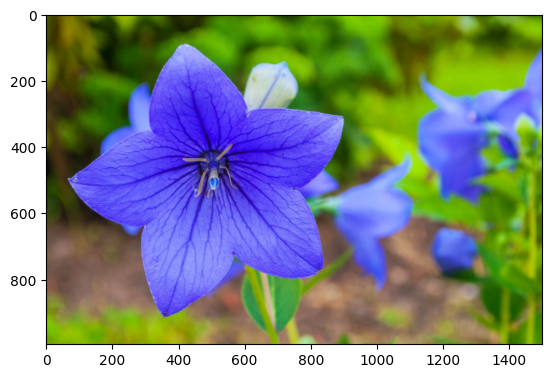

In [55]:
import cv2
import matplotlib.pyplot as plt

flower = plt.imread("/content/GettyImages.jpg")
plt.imshow(flower)

# Color conversion:
Convert images between color spaces like RGB, BGR, HSV, and Grayscale

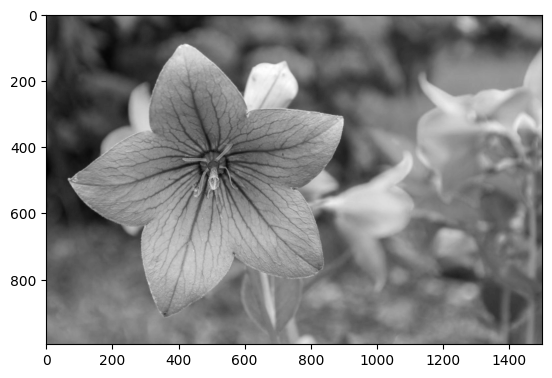

In [ ]:
img_flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)
plt.imshow(img_flower,cmap='gray')

In [ ]:
print(flower.shape)
print(img_flower.shape)

(996, 1500, 3)
(996, 1500)


# Thresholding or Binarization:
Thresholding converts a grayscale image into a binary image (black and white) by choosing a threshold value. Pixels darker than the threshold become black, and pixels lighter become white. This works well for images with high contrast and uniform lighting. You can use OpenCV’s threshold() method to apply thresholding.

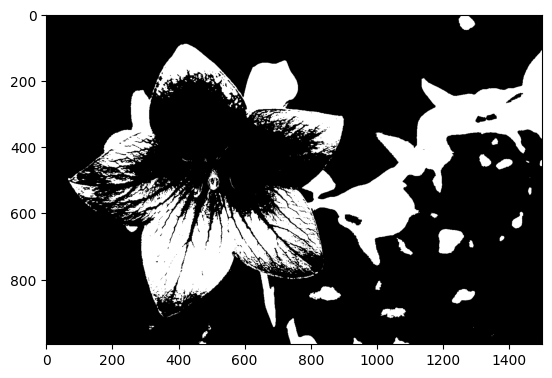

In [ ]:
ret, thresh1 = cv2.threshold(img_flower, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')

# Resizing:
Resizing images to a consistent size is important for machine learning algorithms to work properly. You’ll want all your images to be the same height and width, usually a small size like 28x28 or 64x64 pixels. The resize() method in OpenCV or Pillow libraries make this easy to do programmatically.


## When should I resize an image?
You should resize an image when:
* The image is too large to process efficiently. Reducing size can speed up processing.
* The image needs to match the input size of a machine learning model.
* The image needs to be displayed pn a screen or webpage at a specific. size.

array([[[ 76, 102,   1],
        [ 76,  93,   1],
        [ 77,  81,   4],
        ...,
        [ 55, 101,   2],
        [ 54, 100,   1],
        [ 55, 101,   2]],

       [[ 75, 100,   0],
        [ 73,  90,   0],
        [ 75,  78,   1],
        ...,
        [ 63, 111,   1],
        [ 62, 110,   2],
        [ 61, 109,   1]],

       [[ 76,  98,   0],
        [ 71,  87,   0],
        [ 70,  77,   0],
        ...,
        [ 75, 127,   1],
        [ 71, 123,   0],
        [ 68, 119,   0]],

       ...,

       [[113, 165,   3],
        [111, 163,   1],
        [111, 163,   1],
        ...,
        [ 74, 144,   0],
        [ 76, 143,   1],
        [ 78, 143,   1]],

       [[115, 168,   1],
        [113, 166,   0],
        [112, 165,   0],
        ...,
        [ 75, 144,   0],
        [ 77, 145,   1],
        [ 79, 144,   1]],

       [[118, 172,   0],
        [116, 169,   0],
        [115, 168,   0],
        ...,
        [ 76, 148,   2],
        [ 79, 147,   0],
        [ 82, 146,   0]]], dtype=uint8)
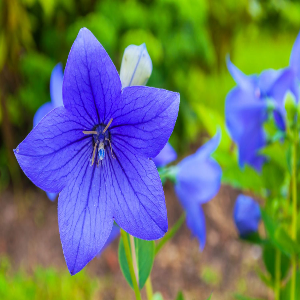

In [ ]:
#cv2.resize(src, dsize, fx, fy, interpolation)
cv2.resize(flower, (300,300))

# Noise reduction techniques?
Some popular noise reduction techniques include:
* Gaussian blur — Uses a Gaussian filter to blur the image and reduce high frequency noise.
* Median blur — Replaces each pixel with the median of neighboring pixels. Effective at removing salt and pepper noise.
* Bilateral filter — Blurs images while preserving edges. It can remove noise while retaining sharp edges.

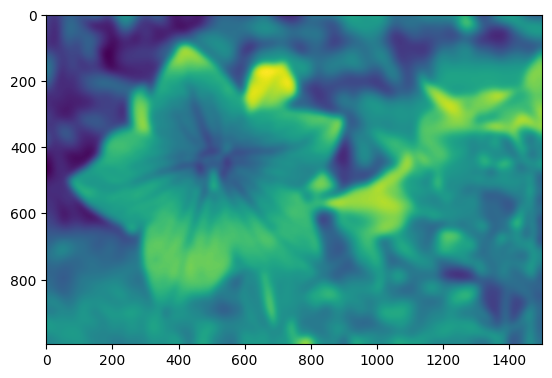

In [ ]:
image = cv2.GaussianBlur(img_flower,(0,0), sigmaX=11, sigmaY=11)
plt.imshow(image)

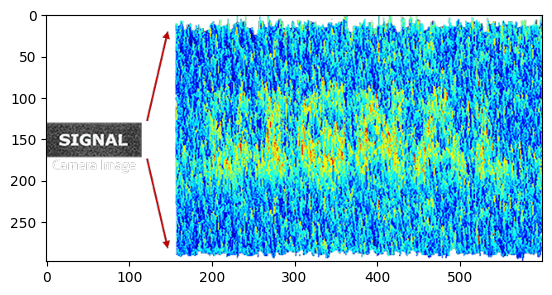

In [ ]:
noise = plt.imread("/content/noise_signal2_new.png")
plt.imshow(noise)

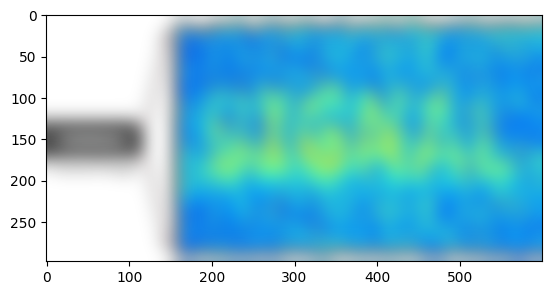

In [ ]:
image = cv2.GaussianBlur(noise,(0,0), sigmaX=11, sigmaY=11)
plt.imshow(image)

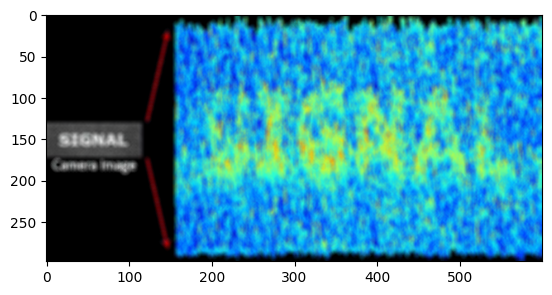

In [ ]:
noise1 = noise.astype('float32')
if len(noise1.shape) == 3 and noise1.shape[2] == 4:  # Check if RGBA
    noise1 = cv2.cvtColor(noise1, cv2.COLOR_RGBA2RGB) # Convert to RGB if has 4 channels.
elif len(noise1.shape) == 3 and noise1.shape[2] > 3: # Check if multi-channel exceeding 3
   noise1 = noise1[:,:,:3] # Select the first 3 channels

bilateral = cv2.bilateralFilter(noise1, 9, 75, 75)
plt.imshow(bilateral)

## Edge Detection:
Edge detection finds the edges of objects in an image. By connecting edges, you can isolate the foreground subject. The Canny edge detector is a popular algorithm implemented in scikit-image’s canny() method. Adjust the low_threshold and high_threshold parameters to detect edges.


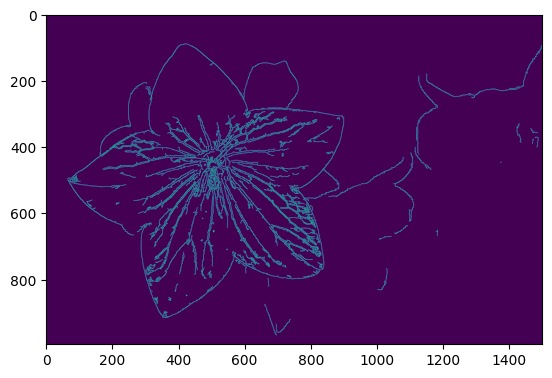

In [57]:
flower_edge = cv2.Canny(flower, 50, 200, None, 3)
plt.imshow(flower_edge)

# Erosion and dilation
Erosion and dilation are fundamental operations in image processing using OpenCV, particularly in morphological transformations. Let’s break them down and provide some example code.

## Erosion
Erosion reduces the boundaries of the foreground object. It removes pixels on object boundaries. The kernel slides through the image, and a pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel are 1. This means that erosion shrinks the foreground.

## Dilation
Dilation increases the object area. Here, a pixel element is ‘1’ if at least one pixel under the kernel is ‘1’. So, it increases the white region in the image or the size of the foreground object.

In [51]:
import cv2
import numpy as np

# Load an image
image1 = cv2.imread('/content/Flower.jpeg')  # Load in grayscale

# Create a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Apply erosion
erosion = cv2.erode(image1, kernel, iterations = 1)

# Apply dilation
dilation = cv2.dilate(image1, kernel, iterations = 1)

Text(0.5, 1.0, 'Original')

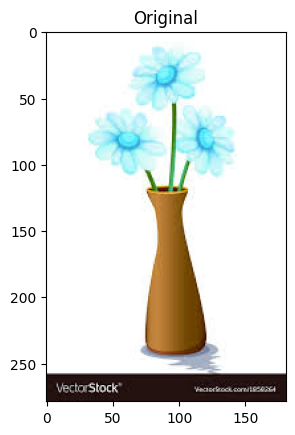

In [52]:
plt.imshow(image1)
plt.title('Original')

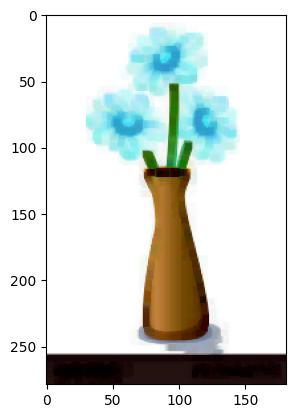

In [53]:
plt.imshow(erosion)

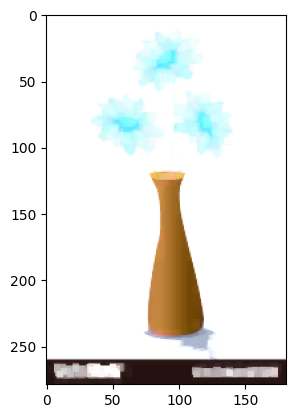

In [54]:
plt.imshow(dilation)

# Data augmentation
Data augmentation is a technique used to artificially increase the size of your dataset by creating modified versions of images in the dataset. It helps improve the robustness and performance of machine learning models, especially in the context of image processing and computer vision. Common augmentation techniques include rotations, translations, flips, scaling, and more.

### Flipping and rotating:
Simply flipping (horizontally or vertically) or rotating (90, 180, 270 degrees) images can generate new data points. For example, if you have 1,000 images of cats, flipping and rotating them can give you 4,000 total images (1,000 original + 1,000 flipped horizontally + 1,000 flipped vertically + 1,000 rotated 90 degrees).

### Cropping:
Cropping images to different sizes and ratios creates new images from the same original. This exposes your model to different framings and compositions of the same content. You can create random crops of varying size, or target more specific crop ratios like squares.

### Color manipulation:
Adjusting brightness, contrast, hue, and saturation are easy ways to create new augmented images. For example, you can randomly adjust the brightness and contrast of images by up to 30% to generate new data points. Be careful not to distort the images too much, or you risk confusing your model.

### Image overlays:
Overlaying transparent images, textures or noise onto existing images is another simple augmentation technique. Adding things like watermarks, logos, dirt/scratches or Gaussian noise can create realistic variations of your original data. Start with subtle overlays and see how your model responds.

### Combining techniques:
For the biggest increase in data, you can combine multiple augmentation techniques on the same images. For example, you can flip, rotate, crop and adjust the color of images, generating many new data points from a single original image. But be careful not to overaugment, or you risk distorting the images beyond recognition!

Using data augmentation, you can easily multiply the size of your image dataset by 4x, 10x or more, all without collecting any new images. This helps combat overfitting and improves model accuracy, all while keeping training time and cost the same.

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/Flower.jpeg')

# Function to display images
def show_image(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Rotation
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Translation
def translate_image(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

# Flipping
def flip_image(image, flipCode):
    flipped = cv2.flip(image, flipCode)
    return flipped

# Scaling
def scale_image(image, scale):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized

In [63]:
rotated = rotate_image(image, 45)  # Rotate 45 degrees

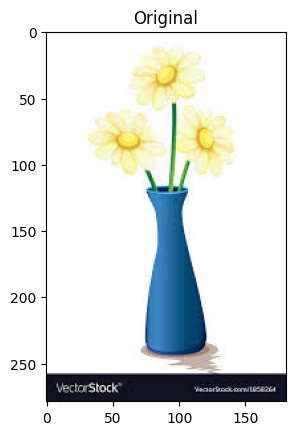

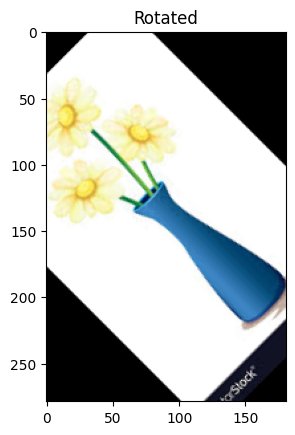

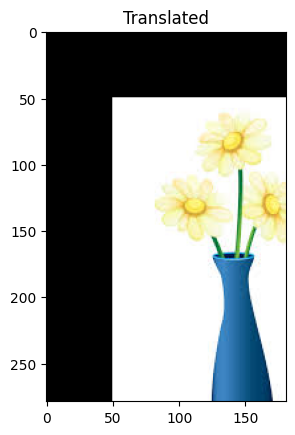

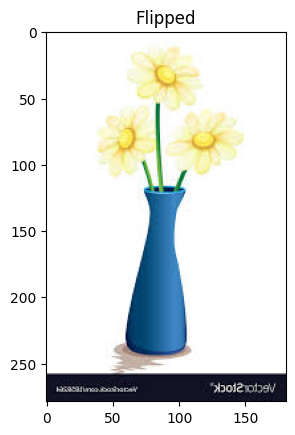

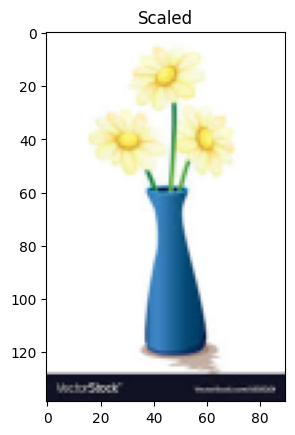

In [64]:
# Apply augmentations
rotated = rotate_image(image, 45)  # Rotate 45 degrees
translated = translate_image(image, 50, 50)  # Translate 50 pixels right and down
flipped = flip_image(image, 1)  # Horizontal flip
scaled = scale_image(image, 0.5)  # Scale to 50%

# Display results
show_image('Original', image)
show_image('Rotated', rotated)
show_image('Translated', translated)
show_image('Flipped', flipped)
show_image('Scaled', scaled)
